In [14]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [15]:
#Loading dataset
df = pd.read_csv('data/gt_full.csv', index_col=0)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36729,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36730,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36731,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36732,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


In [16]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [17]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


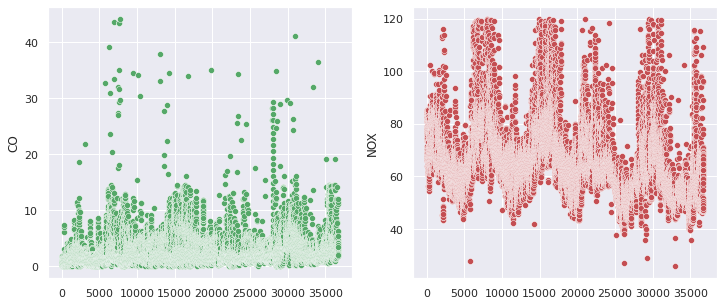

In [26]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,5))
sns.scatterplot(x=df.index, y='CO', data=df, ax=axs[0], color='g')
sns.scatterplot(x=df.index, y='NOX', data=df, ax=axs[1], color='r')

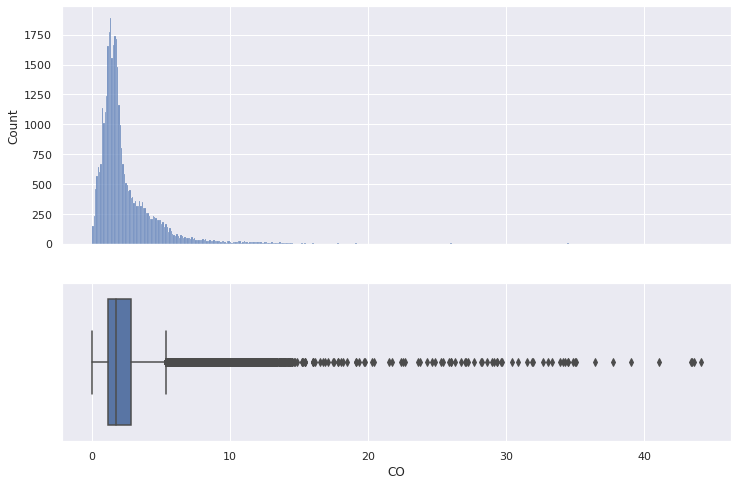

In [25]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(12,8), sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(x= 'CO', data=df, ax=axs[0], color='b')
sns.boxplot(x= 'CO', data=df, ax=axs[1], color='b')

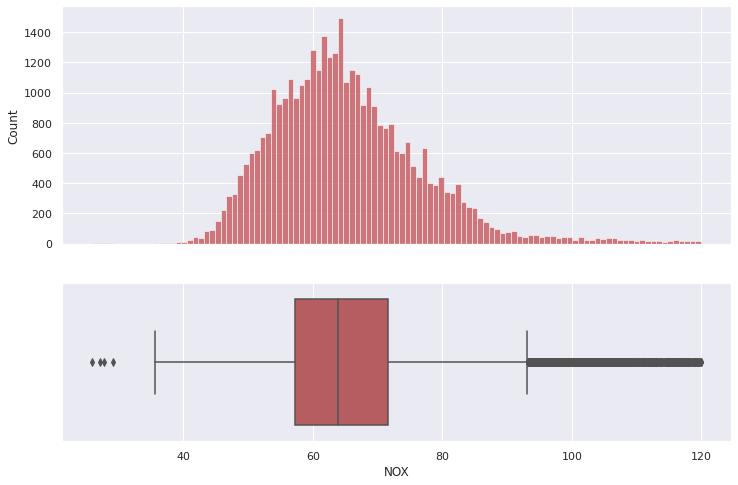

In [27]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(12,8), sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(x= 'NOX', data=df, ax=axs[0], color='r')
sns.boxplot(x= 'NOX', data=df, ax=axs[1], color='r')

In [48]:
#Defining 'X & y' and converting to arrays
X = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']].to_numpy()
y = df[['CO', 'NOX']].to_numpy()

In [81]:
#Importing libreries for Standarization and Tranformations
from sklearn import preprocessing
power_transformer = preprocessing.PowerTransformer(method='box-cox')
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)

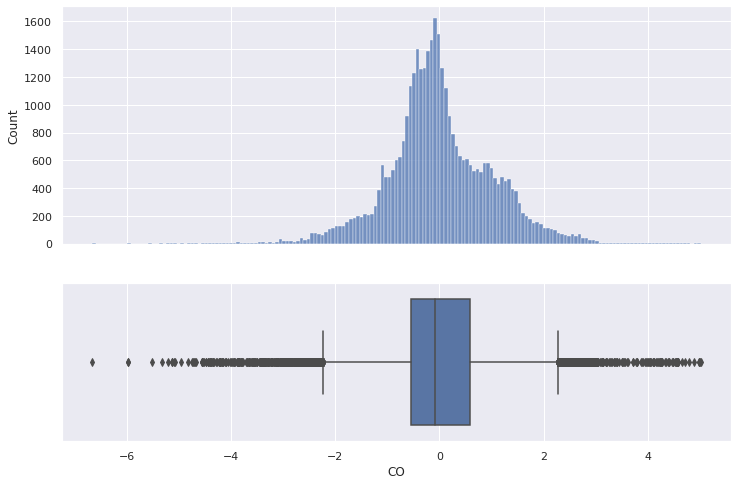

In [82]:
#Power Transformation for y
y_scaled = power_transformer.fit_transform(y)
y_scaled_df = pd.DataFrame(y_scaled, columns=['CO', 'NOX'])
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(12,8), sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(x= 'CO', data=y_scaled_df, ax=axs[0], color='b')
sns.boxplot(x= 'CO', data=y_scaled_df, ax=axs[1], color='b')

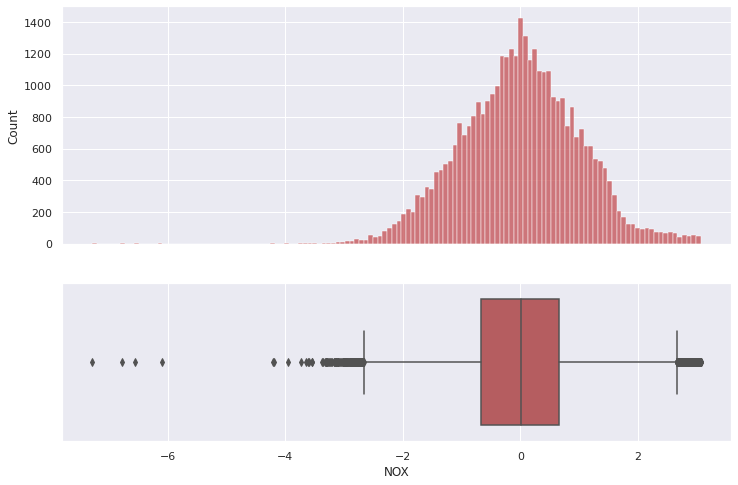

In [83]:
#Power Transformation for y
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(12,8), sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(x= 'NOX', data=y_scaled_df, ax=axs[0], color='r')
sns.boxplot(x= 'NOX', data=y_scaled_df, ax=axs[1], color='r')

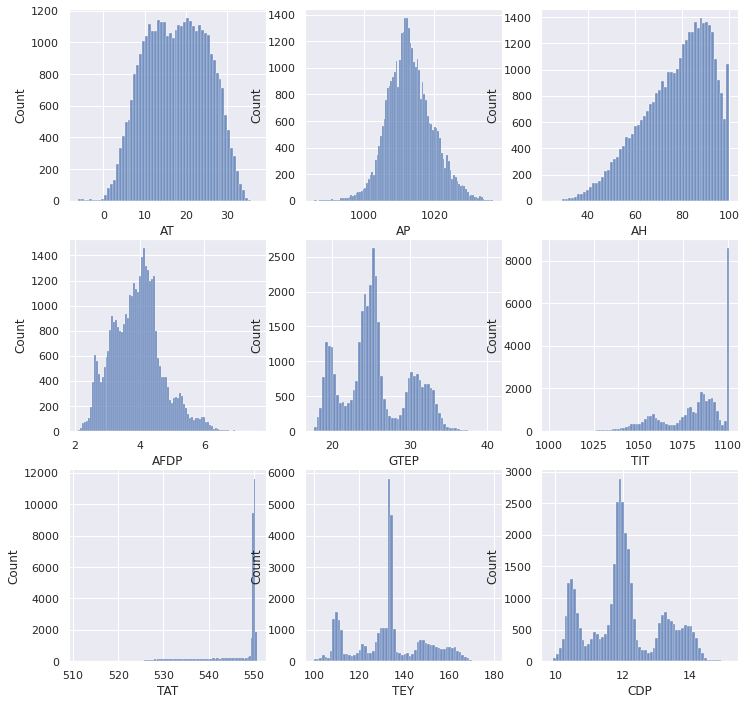

In [31]:
#Ploting X 
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12,12))
sns.histplot(data=X, x='AT', ax=axs[0,0])
sns.histplot(data=X, x='AP', ax=axs[0,1])
sns.histplot(data=X, x='AH', ax=axs[0,2])
sns.histplot(data=X, x='AFDP', ax=axs[1,0])
sns.histplot(data=X, x='GTEP', ax=axs[1,1])
sns.histplot(data=X, x='TIT', ax=axs[1,2])
sns.histplot(data=X, x='TAT', ax=axs[2,0])
sns.histplot(data=X, x='TEY', ax=axs[2,1])
sns.histplot(data=X, x='CDP', ax=axs[2,2])
plt.show()

In [86]:
#Quantile Transformation for y
X_scaled = quantile_transformer.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP'])
X_scaled_df 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,-1.884274,0.895780,0.215810,-0.438725,-0.431186,0.023839,-0.109365,0.356159,-0.154930
1,-1.955295,0.848075,0.255636,-0.444760,-0.443734,0.016310,0.703922,0.356159,-0.168912
2,-2.049286,0.858910,0.299632,-0.430372,-0.426278,0.047692,1.289578,0.468203,0.156199
3,-2.087577,0.848075,0.344022,-0.433075,-0.457729,0.047692,1.215372,0.457033,0.053973
4,-2.085409,0.788455,0.324969,-0.436608,-0.455640,0.000000,0.457033,0.356159,-0.124523
...,...,...,...,...,...,...,...,...,...
36728,-2.116415,2.169694,1.080810,-0.934132,-1.813534,-2.234423,-0.855739,-1.625274,-1.554270
36729,-1.989995,2.196894,1.186034,-0.891160,-1.885184,-2.196894,-0.816850,-1.733071,-1.801198
36730,-1.694747,2.169694,1.336519,-0.727646,-2.052258,-2.178583,-0.747381,-1.992729,-1.384628
36731,-1.620918,2.211127,1.205368,0.053973,-0.576075,-0.503497,0.977487,-0.353219,-0.426601


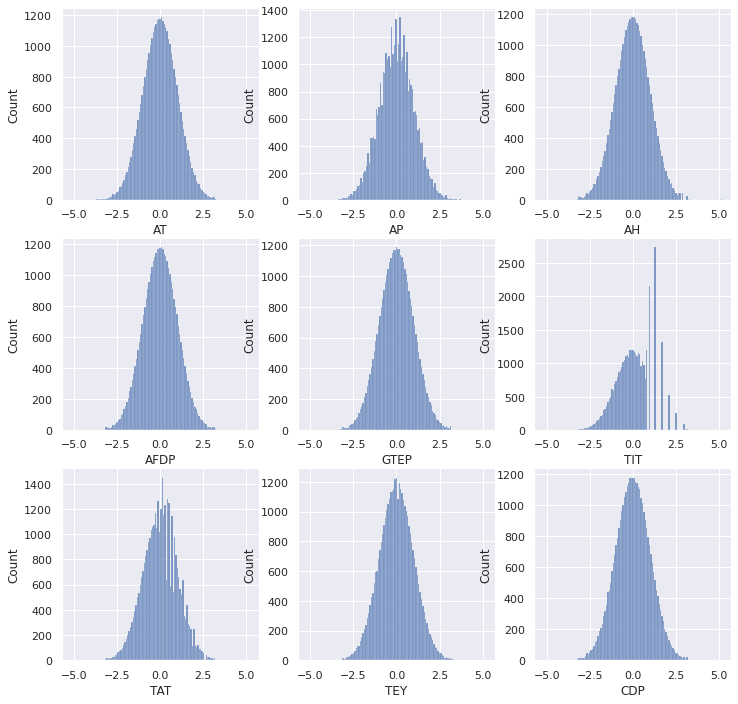

In [88]:
#Ploting X_scaled_df
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12,12))
sns.histplot(data=X_scaled_df , x='AT', ax=axs[0,0])
sns.histplot(data=X_scaled_df , x='AP', ax=axs[0,1])
sns.histplot(data=X_scaled_df , x='AH', ax=axs[0,2])
sns.histplot(data=X_scaled_df , x='AFDP', ax=axs[1,0])
sns.histplot(data=X_scaled_df , x='GTEP', ax=axs[1,1])
sns.histplot(data=X_scaled_df , x='TIT', ax=axs[1,2])
sns.histplot(data=X_scaled_df , x='TAT', ax=axs[2,0])
sns.histplot(data=X_scaled_df , x='TEY', ax=axs[2,1])
sns.histplot(data=X_scaled_df , x='CDP', ax=axs[2,2])
plt.show()